In [3]:
pip install tflite-model-maker

  Using cached https://files.pythonhosted.org/packages/bf/3d/40b7e1b26e0109422b9901f482969ac9c7bee1d5eb937094b66367b3027d/tflite_model_maker-0.2.3-py3-none-any.whl
     |████████████████████████████████| 1.0MB 2.7MB/s 
     |████████████████████████████████| 849kB 16.8MB/s 
     |████████████████████████████████| 81kB 5.8MB/s 
     |████████████████████████████████| 344.9MB 47kB/s 
     |████████████████████████████████| 460kB 36.5MB/s 
     |████████████████████████████████| 1.1MB 35.1MB/s 
     |████████████████████████████████| 194kB 41.4MB/s 
     |████████████████████████████████| 102kB 6.7MB/s 
     |████████████████████████████████| 174kB 46.6MB/s 
     |████████████████████████████████| 36.7MB 129kB/s 
     |████████████████████████████████| 358kB 44.5MB/s 
     |████████████████████████████████| 10.6MB 36.6MB/s 
  Created wheel for fire: filename=fire-0.3.1-py2.py3-none-any.whl size=111005 sha256=04a33844038bf78678c5816734fbc7ed799a264dd2db70dcbb9c2cafc6185c55
  Stored in dire

In [1]:
import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import configs
from tflite_model_maker import ExportFormat
from tflite_model_maker import image_classifier
from tflite_model_maker import ImageClassifierDataLoader
from tflite_model_maker import model_spec

import matplotlib.pyplot as plt

import zipfile

In [2]:
with zipfile.ZipFile("/images.zip","r") as zip_ref:
    zip_ref.extractall("dataset")

In [3]:
data = ImageClassifierDataLoader.from_folder('/content/dataset/images')

INFO:tensorflow:Load image with size: 8500, num_label: 17, labels: animals, architecture, arts-culture, athletics, business-work, fashion, food-drink, health, history, interiors, nature, people, screenshots, street-photography, technology, textures-patterns, travel.


In [4]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

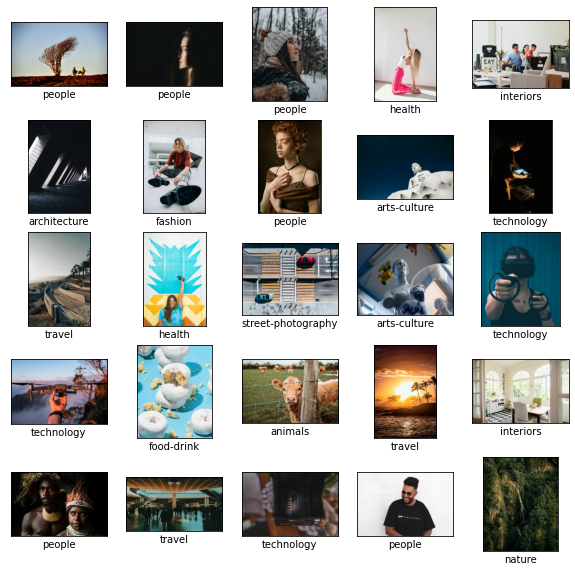

In [5]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.dataset.take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [6]:
model = image_classifier.crjhghheate(train_data, model_spec=model_spec.mobilenet_v2_spec,epochs=20,validation_data=validation_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 17)                21777     
Total params: 2,279,761
Trainable params: 21,777
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/20
212/212 [==============================] - 296s 1s/step - loss: 2.4607 - accuracy: 0.3105 - val_loss: 1.8134 - val_accuracy: 0.5577
Epoch 2/20
212/212 [==============================] - 294s 1s/step - loss: 1.7610 - accuracy: 0.5536 - val_loss: 1.7530 - val_accuracy: 0.5817
Epoch 3/20
212/212 [===================

In [7]:
loss, accuracy = model.evaluate(test_data)

27/27 [==============================] - 37s 1s/step - loss: 1.8979 - accuracy: 0.5224


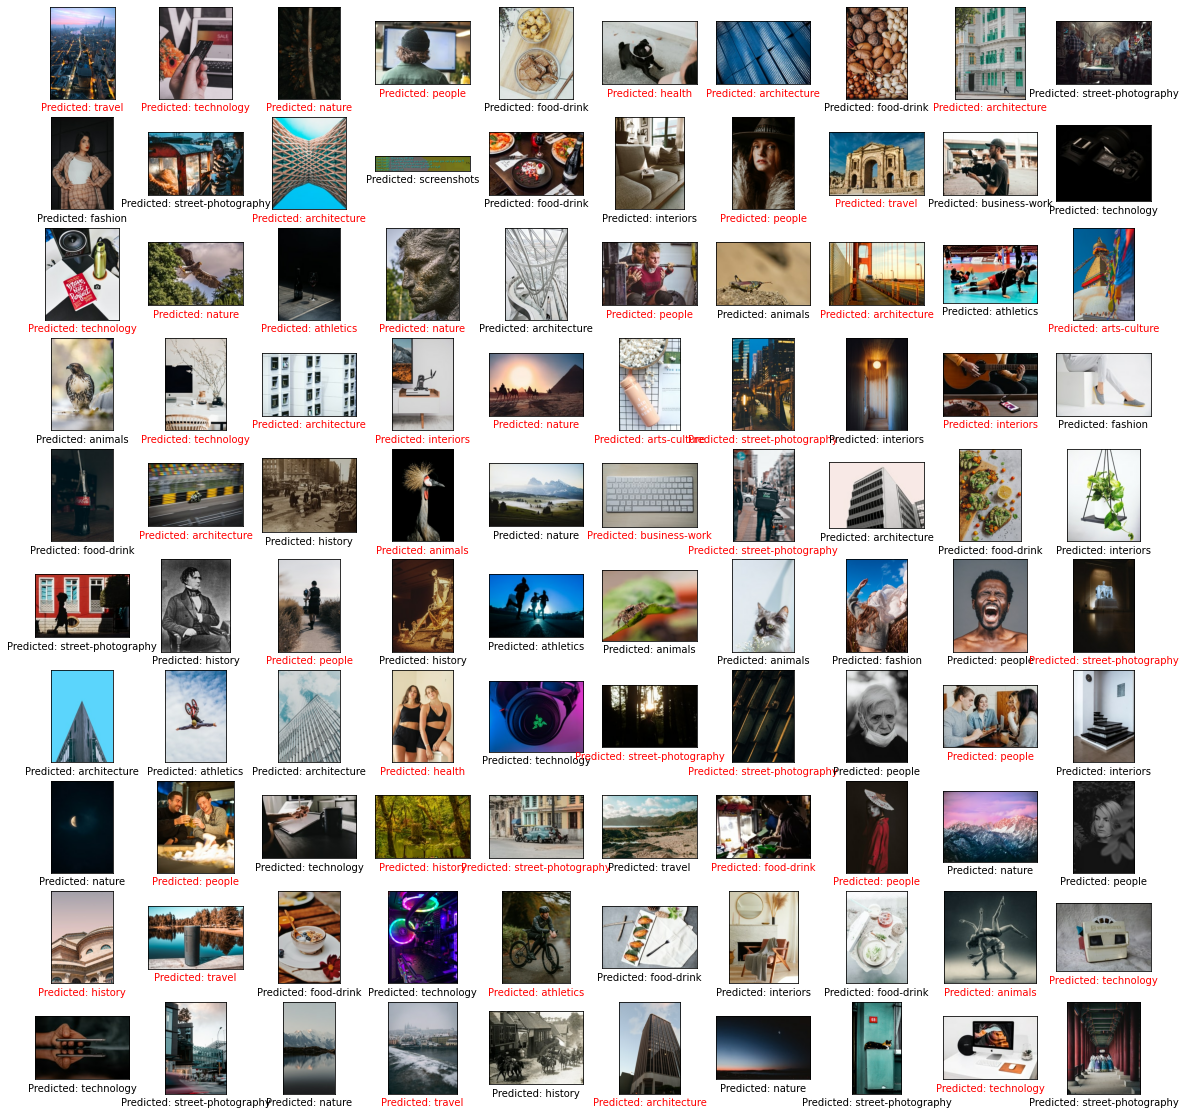

In [8]:
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.dataset.take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [9]:
model.export(export_dir='.')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: /tmp/tmpchyz020_/assets


INFO:tensorflow:Assets written to: /tmp/tmpchyz020_/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpv1vf5rs9/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpv1vf5rs9/labels.txt.
